# Лабораторная работа №4

**Выполнили:**
* Новичков Дмитрий 438329
* Чемякин Андрей 285610
* Васильев Василий 367963

In [19]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings


warnings.filterwarnings("ignore", category=FutureWarning)

## Датасет №1. Air Quality and Pollution Assessment
### Загрузим датасет

In [20]:
url = 'https://drive.google.com/uc?id=1w-R855o8GegnRptuiiQnmAhLgyFTpe3L'
data_classification = pd.read_csv(url)

data_classification.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


### Препроцессинг и отбор признаков

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif


data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [22]:
data_classification.drop_duplicates(keep='first',inplace=True)
data_classification.isnull().any()

,0
Temperature,False
Humidity,False
PM2.5,False
PM10,False
NO2,False
SO2,False
CO,False
Proximity_to_Industrial_Areas,False
Population_Density,False
Air Quality,False


In [23]:
le = LabelEncoder()
data_classification['Air Quality'] = le.fit_transform(data_classification['Air Quality'])

In [24]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 390.8 KB


In [25]:
for col in data_classification.drop(columns='Air Quality').columns:
    q1=np.quantile(data_classification[col],0.25)
    q3=np.quantile(data_classification[col],0.75)
    iqr=q3-q1
    lb=q1-iqr*1.5
    ub=q3+iqr*1.5
    data_classification=data_classification[(data_classification[col]>=lb)&(data_classification[col]<=ub)]

In [26]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 357.3 KB


In [27]:
corr_matrix = data_classification.drop(columns='Air Quality').corr().abs()
upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
to_drop = [column for column in upper_triangle.columns if (upper_triangle[column] > 0.8).sum() > 0]
data_classification.drop(columns=to_drop, inplace=True)

In [28]:
data_classification.head(5)

,Temperature,Humidity,PM2.5,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,21.9,5.6,1.01,12.7,303,0


### Разделение данных

In [29]:
from sklearn.model_selection import train_test_split

X = data_classification.drop(columns='Air Quality')
y = data_classification['Air Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2910, 8) (2910,) (1248, 8) (1248,)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Построение классификационной модели

`NuSVC` — это разновидность метода опорных векторов (SVM), которая вместо использования гиперпараметра $ C $ (регуляризации) вводит гиперпараметр $ \nu $. Этот параметр позволяет управлять двумя важными характеристиками модели:

1. **Верхняя граница на долю опорных векторов**.
2. **Нижняя граница на долю ошибок (шумовых данных)**.

---

#### Прямая задача оптимизации

Модель `NuSVC` решает следующую задачу оптимизации:

$$
\min_{\mathbf{w}, b, \xi, \rho} \frac{1}{2} \|\mathbf{w}\|^2 - \nu \rho + \frac{1}{n} \sum_{i=1}^n \xi_i
$$

при ограничениях:
$$
y_i (\mathbf{w} \cdot \phi(\mathbf{x}_i) + b) \geq \rho - \xi_i, \quad \xi_i \geq 0, \quad \rho \geq 0,
$$

где:
- $ \mathbf{w} $ — вектор весов гиперплоскости;

- $ b $ — свободный член (смещение);

- \$ \xi_i $ — переменные, отвечающие за допущенные ошибки (slack variables);

- $ \rho $ — параметр, определяющий "зазор" между классами;

- $ \nu \in (0, 1] $ — гиперпараметр, определяющий долю опорных векторов и ошибок;

- $ y_i \in \{-1, 1\} $ — метки классов;

- $ \phi(\mathbf{x}_i) $ — отображение входного пространства в пространство более высокой размерности (ядровое пространство).

---

#### Интуитивное значение $ \nu $

- **Верхняя граница на долю опорных векторов:**
  $ \nu $ограничивает максимальную долю точек, которые становятся опорными векторами:
  $$
  \nu \geq \frac{\text{количество опорных векторов}}{n}.
  $$

- **Нижняя граница на долю ошибок:**
  $ \nu $ задаёт минимальную долю точек, которые модель может классифицировать неправильно:
  $$
  \nu \geq \frac{\text{количество ошибок классификации}}{n}.
  $$

---

#### Ядровая версия задачи

В SVM используется трюк ядра (kernel trick), чтобы работать в высокоразмерном пространстве, неявно вычисляя скалярные произведения $ \phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j) $. Задача преобразуется в двойственную форму:

$$
\max_{\alpha} -\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j) + \rho \sum_{i=1}^n \alpha_i
$$

при ограничениях:
$$
\sum_{i=1}^n \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq \frac{1}{n}.
$$

где:
- $ \alpha_i $ — коэффициенты, связанные с опорными векторами;
- $ K(\mathbf{x}_i, \mathbf{x}_j) $ — функция ядра, например, полиномиальное или RBF-ядро.

---

#### Основные гиперпараметры

1. **$ \nu $:** как уже описано, определяет баланс между ошибками классификации и долей опорных векторов.
2. **Ядро ($ K $):**
   - Линейное: $ K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j $;
   - Полиномиальное: $ K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + c)^d $;
   - RBF (гауссовское): $ K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\frac{\|\mathbf{x}_i - \mathbf{x}_j\|^2}{2\sigma^2}\right) $.

---

#### Связь с стандартным SVC

В стандартном SVC гиперпараметр $ C $ регулирует компромисс между максимизацией зазора и минимизацией ошибок классификации. В NuSVC вместо этого используется $ \nu $, что делает параметризацию более интерпретируемой.

Примерная связь между ними:
$$
C = \frac{1}{\nu n}.
$$

---

#### Предсказание

Предсказание для новой точки $ \mathbf{x} $ выполняется как:
$$
f(\mathbf{x}) = \text{sign}\left(\sum_{i=1}^n \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b\right).
$$

---

#### Преимущества $ \nu $-подхода

1. Легче интерпретировать выбор гиперпараметра $ \nu $.
2. Более стабильная оптимизация для задач с сильно несбалансированными данными.
3. Позволяет задать минимальную долю ошибок и максимальную долю опорных векторов напрямую.

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC, NuSVR
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [40]:
from collections import Counter
from sklearn.pipeline import Pipeline


class_counts = Counter(y_train)
min_class_count = min(class_counts.values())
total_samples = len(y_train)


nu_min = 1 / total_samples
nu_max = min_class_count / total_samples
print(f"Допустимый диапазон nu: [{nu_min:.3f}, {nu_max:.3f}]")

if nu_max < nu_min:
    raise ValueError(f"Недостаточное количество данных для использования NuSVC")


pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", NuSVC(class_weight="balanced"))
])

param_grid_class = {
    "svc__nu": np.linspace(max(nu_min, 0.01), nu_max, 10),  # Диапазон nu
    "svc__kernel": ["linear", "rbf"],
    "svc__gamma": ["scale", "auto"]
}


grid_class = GridSearchCV(pipeline, param_grid_class, cv=5, scoring="accuracy", error_score="raise")

try:
    grid_class.fit(X_train, y_train)
    if hasattr(grid_class, "best_estimator_"):
        best_model_class = grid_class.best_estimator_
        print("Лучшие параметры классификатора:", grid_class.best_params_)
    else:
        print("Обучение завершилось с ошибками. Нет лучшего классификатора.")
except ValueError as e:
    print(f"Ошибка обучения: {e}")


Допустимый диапазон nu: [0.000, 0.019]
Лучшие параметры классификатора: {'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__nu': 0.016922489499809085}


### Оценка классификации
#### **Метрики для классификации**

#### Основные метрики
1. **Accuracy (Точность)**  
$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
   - Подходит для сбалансированных данных.

2. **Precision (Точность по классу)**  
$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
   - Указывает, насколько точно модель классифицирует положительный класс.

3. **Recall (Полнота)**  
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
   - Показывает долю найденных положительных объектов из всех положительных.

4. **F1-Score** (Гармоническое среднее Precision и Recall):
$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

In [45]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

warnings.filterwarnings("ignore")


clf = grid_class.best_estimator_
y_pred = clf.predict(X_test)

calibrated_clf = CalibratedClassifierCV(estimator=clf, cv="prefit")
calibrated_clf.fit(X_train, y_train)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, calibrated_clf.predict_proba(X_test), average="macro", multi_class="ovr")

print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1: {f1:.2f}, AUC: {auc:.2f}")

Accuracy: 0.93, Precision: 0.81, Recall: 0.79, F1: 0.80, AUC: 0.97


Testing Evaluation Metrics:
Accuracy:  0.9262820512820513
Precision:  0.810736184004288
Recall:  0.7857989193661262
F1 Score:  0.7966348348974135

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       601
           1       0.52      0.44      0.48        34
           2       0.90      0.96      0.93       394
           3       0.83      0.74      0.79       219

    accuracy                           0.93      1248
   macro avg       0.81      0.79      0.80      1248
weighted avg       0.92      0.93      0.92      1248


Confusion Matrix: 



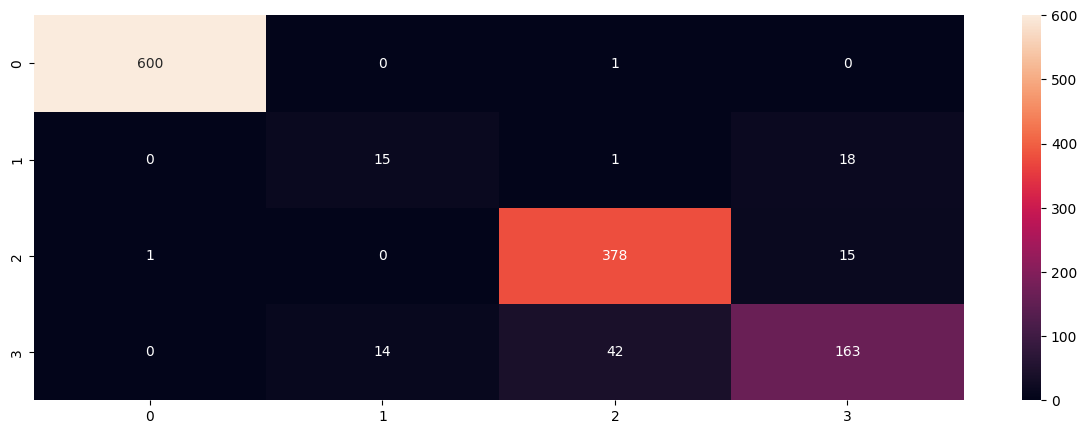

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("Testing Evaluation Metrics:")
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred, average='macro'))
print("Recall: ",recall_score(y_test, y_pred, average='macro'))
print("F1 Score: ",f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report: \n",classification_report(y_test, y_pred))
print("\nConfusion Matrix: \n")
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d')
plt.show()

### Попробуем SVC

In [50]:
from sklearn.svm import SVC

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(class_weight="balanced", probability=True))
])

param_grid_class = {
    "svc__C": [0.1, 1, 10],
    "svc__kernel": ["linear", "rbf"],
    "svc__gamma": ["scale", "auto"]
}

grid_class = GridSearchCV(pipeline, param_grid_class, cv=5, scoring="accuracy", error_score="raise")
grid_class.fit(X_train, y_train)
best_model_class = grid_class.best_estimator_
print("Лучшие параметры классификатора:", grid_class.best_params_)

Лучшие параметры классификатора: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [51]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

warnings.filterwarnings("ignore")


clf = grid_class.best_estimator_
y_pred = clf.predict(X_test)

calibrated_clf = CalibratedClassifierCV(estimator=clf, cv="prefit")
calibrated_clf.fit(X_train, y_train)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, calibrated_clf.predict_proba(X_test), average="macro", multi_class="ovr")

print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1: {f1:.2f}, AUC: {auc:.2f}")

Accuracy: 0.94, Precision: 0.82, Recall: 0.86, F1: 0.83, AUC: 0.99


И он оказался немного лучше :)

## Датасет №2. Prediction of Insurance Charges
### Загрузим датасет

In [52]:
url = 'https://drive.google.com/uc?id=1KDIhpV8oJHvMckXSoKkIOSP9tKGuqWCr'
data_regression = pd.read_csv(url)

data_regression.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


### Препроцессинг и отбор признаков

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_regression['smoker'] = le.fit_transform(data_regression['smoker'])
data_regression['sex'] = le.fit_transform(data_regression['sex'])
data_regression['region'] = le.fit_transform(data_regression['region'])

In [54]:
data_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   int64  
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [55]:
spheres = ['age', 'children']

for i in range(len(spheres)):
    col1 = spheres[i]
    for j in range(len(spheres)):
        col2 = spheres[j]
        data_regression[f"{col1}_{col2}"] = data_regression[f"{col1}"] * data_regression[f"{col2}"]
data_regression.head()

,index,age,sex,bmi,children,smoker,region,charges,age_age,age_children,children_age,children_children
0,0,19,0,27.900,0,1,3,16884.92400,361,0,0,0
1,1,18,1,33.770,1,0,2,1725.55230,324,18,18,1
2,2,28,1,33.000,3,0,2,4449.46200,784,84,84,9
3,3,33,1,22.705,0,0,1,21984.47061,1089,0,0,0
4,4,32,1,28.880,0,0,1,3866.85520,1024,0,0,0


In [56]:
for col in data_regression.drop(columns='charges').columns:
    q1 = np.quantile(data_regression[col],0.25)
    q3 = np.quantile(data_regression[col],0.75)
    iqr = q3-q1
    lb = q1-iqr*1.5
    ub = q3+iqr*1.5
    data_regression = data_regression[(data_regression[col]>=lb) & (data_regression[col]<=ub)]

In [57]:
data_regression.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 1 to 1336
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              990 non-null    int64  
 1   age                990 non-null    int64  
 2   sex                990 non-null    int64  
 3   bmi                990 non-null    float64
 4   children           990 non-null    int64  
 5   smoker             990 non-null    int64  
 6   region             990 non-null    int64  
 7   charges            990 non-null    float64
 8   age_age            990 non-null    int64  
 9   age_children       990 non-null    int64  
 10  children_age       990 non-null    int64  
 11  children_children  990 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 100.5 KB


In [58]:
data_regression.drop_duplicates(keep='first',inplace=True)
data_regression.isnull().any()

,0
index,False
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False
age_age,False
age_children,False


In [59]:
corr_matrix = data_regression.drop(columns='charges').corr().abs()
upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
to_drop = [column for column in upper_triangle.columns if (upper_triangle[column] > 0.8).sum() > 0]
data_regression.drop(columns=to_drop, inplace=True)

In [60]:
data_regression.head(5)

,index,age,sex,bmi,children,smoker,region,charges
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520
5,5,31,0,25.740,0,0,2,3756.62160


### Разделим данные

In [61]:
from sklearn.model_selection import train_test_split

X = data_regression.drop(columns='charges')
y = data_regression['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(693, 7) (693,) (297, 7) (297,)


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Построение регрессионной модели

**Nu-SVR** (Nu-Support Vector Regression) — это вариант метода опорных векторов, который использует параметр $ \nu $ для управления долей опорных векторов и погрешностей. В отличие от классификации, в регрессии цель состоит в том, чтобы найти модель, которая аппроксимирует данные с учётом допустимой погрешности $ \epsilon $.

---

#### Прямая задача оптимизации:

Nu-SVR решает следующую задачу:
$$
\min_{\mathbf{w}, b, \xi, \xi^*} \frac{1}{2} \|\mathbf{w}\|^2 + \nu \epsilon + \frac{1}{n} \sum_{i=1}^n (\xi_i + \xi_i^*),
$$

при ограничениях:
$$
\begin{aligned}
y_i - (\mathbf{w} \cdot \phi(\mathbf{x}_i) + b) &\leq \epsilon + \xi_i, \\
(\mathbf{w} \cdot \phi(\mathbf{x}_i) + b) - y_i &\leq \epsilon + \xi_i^*, \\
\xi_i, \xi_i^* &\geq 0, \\
\epsilon &\geq 0,
\end{aligned}
$$

где:
- $ \mathbf{w} $ — вектор весов гиперплоскости,
- $ b $ — смещение,
- $ \xi_i, \xi_i^* $ — переменные, представляющие отклонения за пределами \( \epsilon \),
- $ \phi(\mathbf{x}_i) $ — отображение входного пространства в ядровое пространство,
- $ \nu \in (0, 1] $ — параметр, определяющий долю опорных векторов и ошибок,
- $ \epsilon $ — допустимая погрешность регрессии.

---

#### Двойственная задача:

Двойственная задача для Nu-SVR:
$$
\max_{\alpha, \alpha^*} -\frac{1}{2} \sum_{i, j=1}^n (\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*) K(\mathbf{x}_i, \mathbf{x}_j)
+ \sum_{i=1}^n (\alpha_i - \alpha_i^*) y_i,
$$

при ограничениях:
$$
\begin{aligned}
\sum_{i=1}^n (\alpha_i - \alpha_i^*) &= 0, \\
0 \leq \alpha_i, \alpha_i^* &\leq \frac{1}{n}.
\end{aligned}
$$

где $ K(\mathbf{x}_i, \mathbf{x}_j) $ — ядровая функция, например, RBF или полиномиальное ядро.

---

#### Связь между $ \nu $ и $ \epsilon $

- $ \nu $ управляет соотношением между долей опорных векторов и долей нарушений погрешности $ \epsilon $.
- $ \epsilon $ автоматически подстраивается под данные в процессе оптимизации, если явно не задано.

---

#### Преимущества Nu-SVR

1. Более интерпретируемый параметр $ \nu $ по сравнению с $ C $ в стандартном SVR.
2. Автоматическая подстройка $ \epsilon $ в зависимости от данных.
3. Эффективен для задач с шумовыми данными.

In [68]:
from sklearn.svm import NuSVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np


nu_min = 1 / len(y_train)
nu_max = 0.9

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", NuSVR())
])

param_grid_reg = {
    "svr__nu": np.linspace(max(nu_min, 0.01), nu_max, 10),
    "svr__C": [0.1, 1, 10, 100],
    "svr__kernel": ["linear", "rbf", "poly"],
    "svr__gamma": ["scale", "auto"]
}

grid_reg = GridSearchCV(pipeline, param_grid_reg, cv=5, scoring="neg_mean_squared_error", error_score="raise")

try:
    grid_reg.fit(X_train, y_train)

    best_model_reg = grid_reg.best_estimator_
    print("Лучшие параметры регрессора:", grid_reg.best_params_)

except ValueError as e:
    print(f"Ошибка обучения: {e}")


Лучшие параметры регрессора: {'svr__C': 100, 'svr__gamma': 'scale', 'svr__kernel': 'linear', 'svr__nu': 0.20777777777777778}


#### **Метрики для регрессии**

1. **Mean Squared Error (MSE)**  
$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$
   - Наиболее популярна, но чувствительна к выбросам.

2. **Mean Absolute Error (MAE)**  
$$
\text{MAE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|
$$
   - Устойчива к выбросам.

3. **$R^2$ (Коэффициент детерминации)**  
$$
R^2 = 1 - \frac{\sum_{i=1}^N (y_i - \hat{y}_i)^2}{\sum_{i=1}^N (y_i - \bar{y})^2}
$$
   - Показывает, насколько хорошо модель объясняет разброс данных. (объясненная доля дисперсии)

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_grid_reg = grid_reg.best_estimator_

y_pred = best_grid_reg.predict(X_test)
mse_squared = mean_squared_error(y_test, y_pred)
mae_squared = mean_absolute_error(y_test, y_pred)
r2_squared = r2_score(y_test, y_pred)

print(f"MSE: {mse_squared:.2f}, MAE: {mae_squared:.2f}, R^2: {r2_squared:.2f}")

MSE: 24109528.64, MAE: 2067.60, R^2: 0.33


In [70]:
data_regression['prediction'] = best_grid_reg.predict(X)

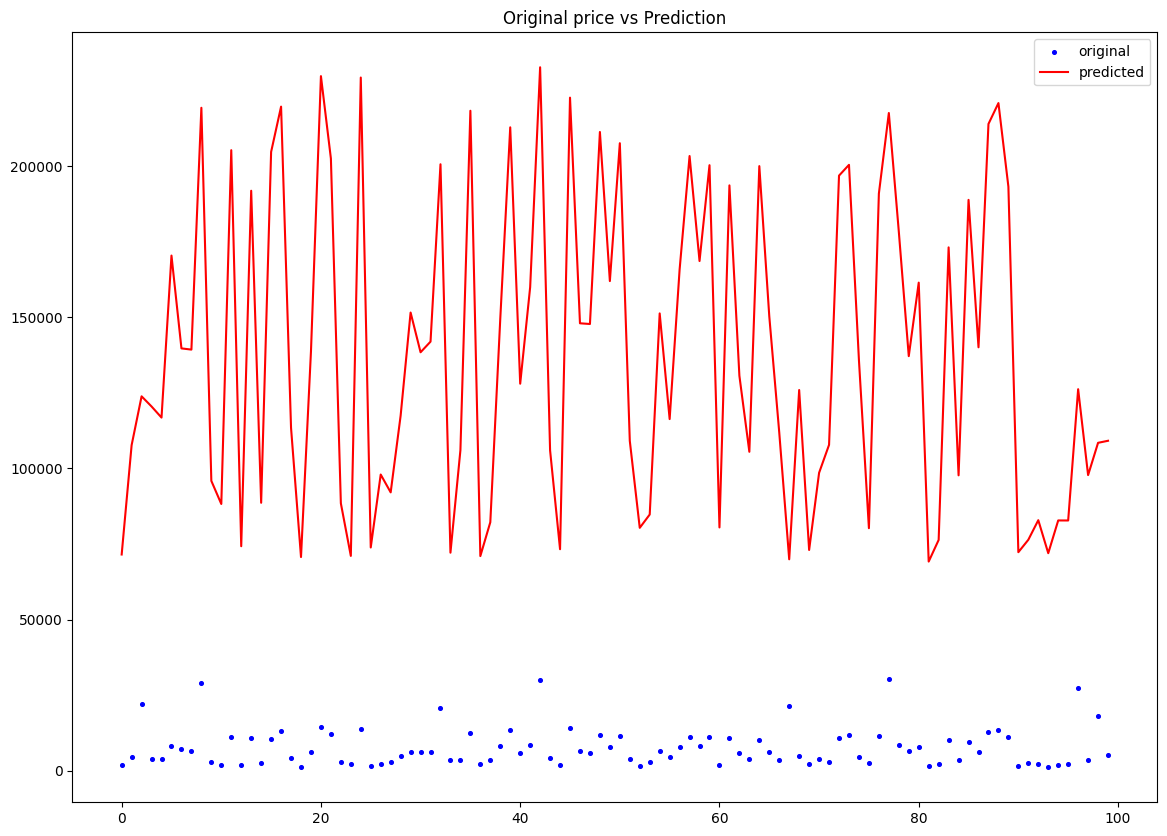

In [74]:
x_axis = range(len(data_regression['prediction'].head(100)))

plt.figure(figsize=(14,10))
plt.title('Original price vs Prediction')
plt.scatter(x_axis, data_regression['charges'].head(100), s=7, color="blue", label="original")
plt.plot(x_axis, data_regression['prediction'].head(100), lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()